In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Linear Regression:**

Linear regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. In linear regression, the relationship between the variables is modeled using a linear equation. This equation can be used to predict the value of the dependent variable based on the values of the independent variables.

There are several types of linear regression, including simple linear regression, multiple linear regression, and polynomial regression.

* **Simple linear regression:** This type of linear regression models the relationship between a dependent variable and a single independent variable. It is used to identify the strength of the relationship between the two variables and to predict the value of the dependent variable based on the value of the independent variable.

* **Multiple linear regression:** This type of linear regression models the relationship between a dependent variable and two or more independent variables. It is used to identify the strength of the relationship between the variables and to predict the value of the dependent variable based on the values of the independent variables.

* **Polynomial regression:** This type of linear regression is used to model relationships between the dependent and independent variables that are not linear. It can be used to fit a curve to the data and make predictions based on the curve.

You can find my project about simple linear regression [here](http://www.kaggle.com/code/emineyetm/simple-linear-regression-using-python).

*Multiple regression* is a statistical method used to model the relationship between multiple independent variables and a dependent variable. In Python, this can be performed using the sklearn library. To use multiple regression with this library, you will first need to create a LinearRegression object, then train the model on your data using the fit() method. Once the model is trained, you can use the predict() method to make predictions on new data.

* Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn 
* Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables 

**Assumption of Regression Model :** 
* Linearity: The relationship between dependent and independent variables should be linear.
* Homoscedasticity: Constant variance of the errors should be maintained.
* Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.
* Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
# Reading the Dataset
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [6]:
df.shape

(36, 5)

In [7]:
print(df.corr())

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


In [8]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


**Then make a list of the independent values and call this variable X. Put the dependent values in a variable called y.**

It is common to name the list of independent values with an uppercase X and the list of dependent values with a lowercase y.
* **Equation:** Sales = β0 + (β1 * Weight) + (β2 * Volume) + e
* Setting the values for independent **(X)** variable and dependent **(Y)** variable

In [9]:
#Setting the value for X and Y
X = df[['Weight', 'Volume']]
y = df['CO2']

**Checking for outliers**

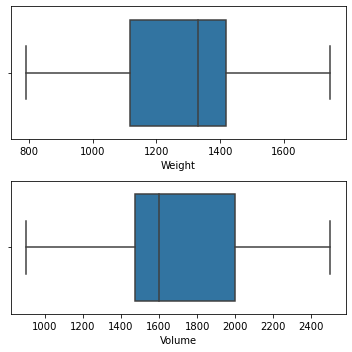

In [10]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Weight'], ax = axs[0])
plt2 = sns.boxplot(df['Volume'], ax = axs[1])
plt.tight_layout()

# Exploratory Data Analysis

**Distribution of the target variable**

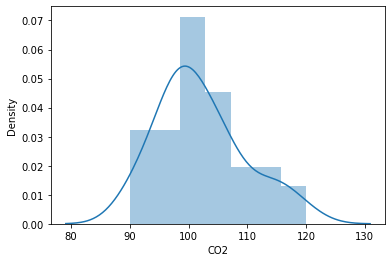

In [11]:
sns.distplot(df['CO2']);

**Conclusion:** It is normally distributed

**Relationship of CO2 with other variables**

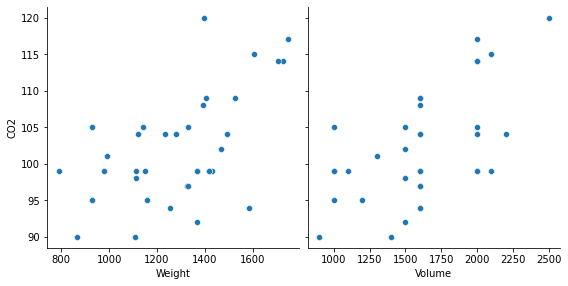

In [12]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

**Heatmap**
The sns.heatmap() function creates a visualization that shows the correlation matrix of a dataset as a heatmap. The annot parameter of this function shows or does not show correlation values in the cells of the heatmap. If this parameter is set to True, correlation values in cells are displayed.

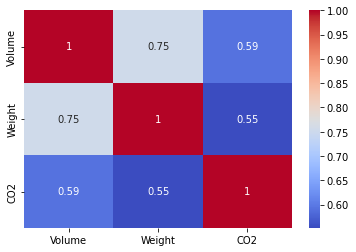

In [13]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Model Building

**Splitting the dataset into train and test set**

We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from sklearn.model_selection library. It is usually good to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [14]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [15]:
y_train.shape

(25,)

In [16]:
y_test.shape

(11,)

In [17]:
reg_model = linear_model.LinearRegression()

In [18]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [19]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589247


[('Weight', 0.017180064599637397), ('Volume', 0.0025046399866402967)]

In [20]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [21]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [22]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [23]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636312
Mean Square Error: 63.39765310998784
Root Mean Square Error: 7.962264320530174
